In [1]:
import pandas as pd
import calendar
from pandas import Series

df = pd.read_csv('ar_properties.csv')
#df = pd.read_csv('data_old.csv')

In [2]:
df.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,DyVXfkpKygVBKuUk5olH+A==,Propiedad,2020-08-22,2020-09-03,2020-08-22,-34.407468,-58.957367,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,...,NaN,133139.0,NaN,NaN,NaN,Mensual,VENTA - Lote Industrial 130.000m2 - Parque Ind...,Lote (Nro.50) mide 133.139 m2\n<br>Valor: U$S ...,Lote,Venta
1,9naojilaMecJN4jlQiTkGg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-37.996039,-57.542509,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,...,NaN,687.0,687.0,NaN,NaN,Mensual,Casa - Santa Cecilia,Conjunto edilicio de casa y departamentos en b...,Otro,Venta
2,tlCPRJPjoDEUzuuCelemAQ==,Propiedad,2020-08-22,2020-08-31,2020-08-22,-31.380187,-58.009182,Argentina,Entre Ríos,Concordia,...,1.0,80.0,80.0,NaN,NaN,Mensual,Casa - Concordia,"Casa de un dormitorio, cocina, baño, living co...",Casa,Alquiler
3,Zw3b91glQUO3HNrM5fPYlQ==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-27.494106,-55.123455,Argentina,Misiones,Oberá,...,1.0,NaN,NaN,NaN,NaN,Mensual,Terreno - Obera,IMPORTANTE PROPIEDAD EN VENTA EN OBERA MISIONE...,Lote,Venta
4,bsU81gm9JEgtZCbTYgvykg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-32.948856,-60.630464,Argentina,Santa Fe,Rosario,...,1.0,76.0,66.0,NaN,NaN,Mensual,Departamento - Rosario,PORTAL DE LOS MARINOS<br>Es un complejo de viv...,Departamento,Venta


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1000000 non-null  object 
 1   ad_type          1000000 non-null  object 
 2   start_date       1000000 non-null  object 
 3   end_date         1000000 non-null  object 
 4   created_on       1000000 non-null  object 
 5   lat              894233 non-null   float64
 6   lon              894191 non-null   float64
 7   l1               1000000 non-null  object 
 8   l2               1000000 non-null  object 
 9   l3               965273 non-null   object 
 10  l4               306162 non-null   object 
 11  l5               5530 non-null     object 
 12  l6               0 non-null        float64
 13  rooms            714179 non-null   float64
 14  bedrooms         649933 non-null   float64
 15  bathrooms        765122 non-null   float64
 16  surface_total    47

### Nos quedamos con avisos de venta de departamentos en Capital Federal

In [4]:
df_caba = df.loc[df['l2'] == 'Capital Federal']
df_caba = df_caba.loc[df['operation_type'] == 'Venta']
df_caba = df_caba.loc[df['property_type'] == 'Departamento']
df_caba = df_caba.loc[df['currency'] == 'USD']
# hay datos de 2020 y 2021
# nos quedamos con los datos a partir del año 2021
df_caba['created_on'] = pd.to_datetime(df_caba['created_on'])
df_caba['year'] = df_caba['created_on'].map(lambda x:x.year)
df_caba['month'] = df_caba['created_on'].map(lambda x:x.month)
#df_caba = df_caba.loc[df['year'] == 2021]
del df_caba['property_type']
df_caba.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,surface_total,surface_covered,price,currency,price_period,title,description,operation_type,year,month
163,U3qdJMKXnOJm0Y1tWpnnfg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.597364,-58.372987,Argentina,Capital Federal,Retiro,...,NaN,25.0,85000.0,USD,Mensual,Departamento - Capital Federal,"EXCELENTE DEPTO MUY LUMINOSO, <br><br>LAS MEDI...",Venta,2020,8
164,gsQB/JzLxaQdBLfNcm/DMw==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.600004,-58.417191,Argentina,Capital Federal,Almagro,...,38.0,31.0,110000.0,USD,Mensual,Monoambiente c/Cochera Fija Cubierta. Edif c/P...,Monoambiente de 38m² en muy buen estado con Am...,Venta,2020,8
165,SlPt6GJRjM+cO4rD3n3HFQ==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.581699,-58.433547,Argentina,Capital Federal,Palermo,...,35.0,30.0,105000.0,USD,Mensual,Oportunidad!!!!Palermo Hollywood Monoamb amobl...,RETASADO Venta Palermo Niceto Vega y Bonpland ...,Venta,2020,8
166,ZaH+6DXJ4MLM6QqZXhgWiw==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.595044,-58.442538,Argentina,Capital Federal,Palermo,...,51.0,46.0,150000.0,USD,Mensual,2 AMBIENTES CON COCHERA Y PARRILLA EN VILLA CR...,CONTACTO: 11- (LLAMADOS O WHATSAPP)<br><br>EXC...,Venta,2020,8
167,r7qrM5xaYo8QImSnqyKyYA==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.582549,-58.417350,Argentina,Capital Federal,Palermo,...,53.0,53.0,136500.0,USD,Mensual,2 AMB EN PALERMO,2 AMBIENTES CON 2 BALCÓNES PISO 8<br><br>Inmej...,Venta,2020,8


In [5]:
df_caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131720 entries, 163 to 999978
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               131720 non-null  object        
 1   ad_type          131720 non-null  object        
 2   start_date       131720 non-null  object        
 3   end_date         131720 non-null  object        
 4   created_on       131720 non-null  datetime64[ns]
 5   lat              123428 non-null  float64       
 6   lon              123428 non-null  float64       
 7   l1               131720 non-null  object        
 8   l2               131720 non-null  object        
 9   l3               131209 non-null  object        
 10  l4               5914 non-null    object        
 11  l5               0 non-null       object        
 12  l6               0 non-null       float64       
 13  rooms            125620 non-null  float64       
 14  bedrooms         1

Tranformación y limpieza datos

In [6]:
def divide_by_one_thounsans(x):
    return x / 1000

df_caba['created_on'] = pd.to_datetime(df_caba['created_on'])
df_caba['surface_total'].fillna((df_caba['surface_total'].mean()), inplace=True)
df_caba['surface_covered'].fillna((df_caba['surface_covered'].mean()), inplace=True)
df_caba['bedrooms'].fillna((df_caba['bedrooms'].mean()), inplace=True)
df_caba['rooms'].fillna((df_caba['rooms'].mean()), inplace=True)

df_caba['price'] = df_caba['price'].apply(divide_by_one_thounsans)
df_caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131720 entries, 163 to 999978
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               131720 non-null  object        
 1   ad_type          131720 non-null  object        
 2   start_date       131720 non-null  object        
 3   end_date         131720 non-null  object        
 4   created_on       131720 non-null  datetime64[ns]
 5   lat              123428 non-null  float64       
 6   lon              123428 non-null  float64       
 7   l1               131720 non-null  object        
 8   l2               131720 non-null  object        
 9   l3               131209 non-null  object        
 10  l4               5914 non-null    object        
 11  l5               0 non-null       object        
 12  l6               0 non-null       float64       
 13  rooms            131720 non-null  float64       
 14  bedrooms         1

Eliminando atributos que no son necesarios para el análisis

In [7]:
del df_caba['description']
del df_caba['title']
del df_caba['price_period']
del df_caba['l6']
del df_caba['l5']
del df_caba['id']

Limpieza de datos

<AxesSubplot:>

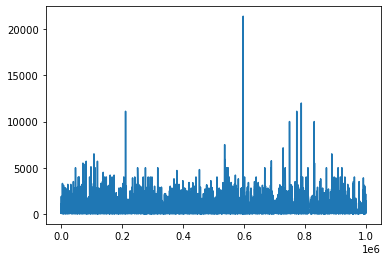

In [8]:
df_caba['price'].plot()

<AxesSubplot:>

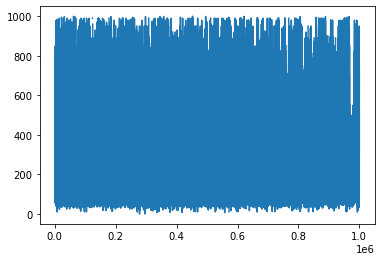

In [9]:
df_caba['price'] = df_caba['price'].loc[df_caba['price'] < 1000]
df_caba['price'].plot()

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

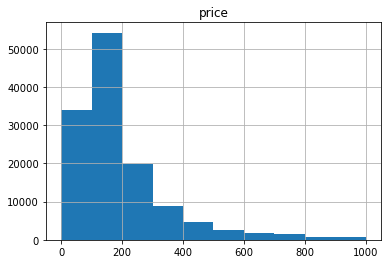

In [10]:
df_caba.hist(column='price')

<AxesSubplot:>

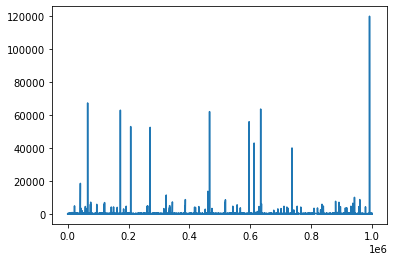

In [11]:
df_caba['surface_covered'].plot()

<AxesSubplot:>

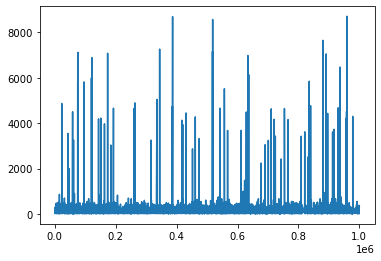

In [12]:
df_caba['surface_covered'] = df_caba['surface_covered'].loc[df_caba['surface_covered'] < 10000]
df_caba['surface_covered'].plot()

<AxesSubplot:>

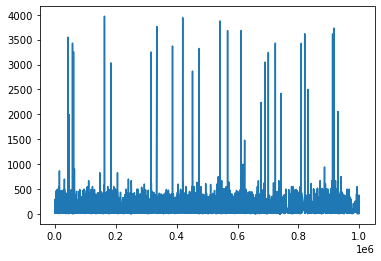

In [13]:
df_caba['surface_covered'] = df_caba['surface_covered'].loc[df_caba['surface_covered'] < 4000]
df_caba['surface_covered'].plot()

<AxesSubplot:>

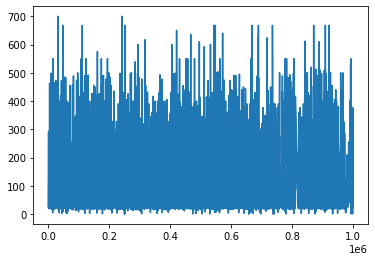

In [14]:
df_caba['surface_covered'] = df_caba['surface_covered'].loc[df_caba['surface_covered'] < 750]
df_caba['surface_covered'].plot()

<AxesSubplot:>

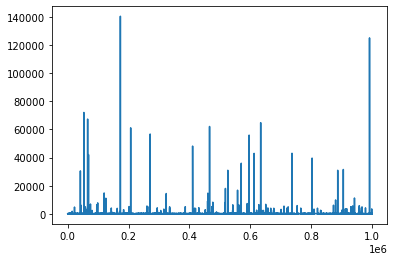

In [15]:
df_caba['surface_total'].plot()

<AxesSubplot:>

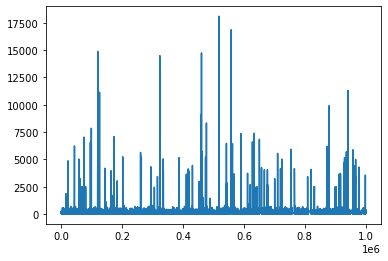

In [16]:
df_caba['surface_total'] = df_caba['surface_total'].loc[df_caba['surface_total'] < 20000]
df_caba['surface_total'].plot()

<AxesSubplot:>

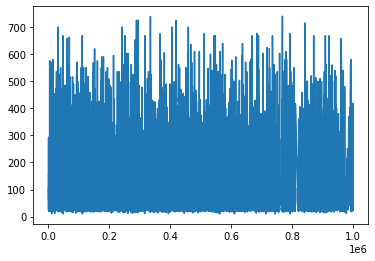

In [17]:
df_caba['surface_total'] = df_caba['surface_total'].loc[df_caba['surface_total'] < 750]
df_caba['surface_total'].plot()

<AxesSubplot:xlabel='surface_covered'>

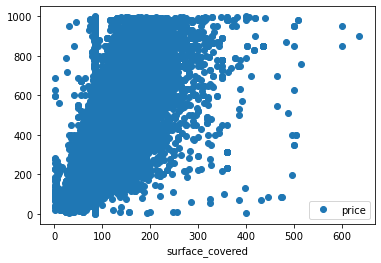

In [18]:
df_caba.plot(x='surface_covered', y='price', style='o')

<AxesSubplot:xlabel='surface_total'>

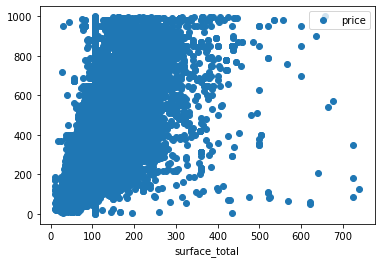

In [19]:
df_caba.plot(x='surface_total', y='price', style='o')

Para el análisis sacamos atributos que ya no necesitamos:

In [20]:
del df_caba['ad_type']
del df_caba['start_date']
del df_caba['end_date']
del df_caba['lat']
del df_caba['lon']
del df_caba['currency']
del df_caba['operation_type']
del df_caba['l4']
del df_caba['l1']
del df_caba['l2']

In [21]:
df_caba.to_csv('cleaned_data_caba.csv', index=False)

### algunas comparativas

<AxesSubplot:xlabel='rooms'>

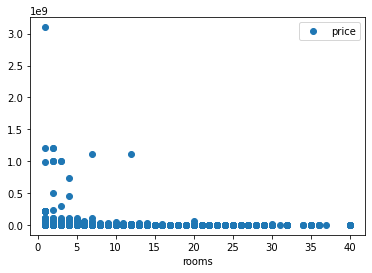

In [22]:
# directamente no se puede porque hay varios datos 
df.plot(x='rooms', y='price', style='o')
#df.plot(x='price', y='surface_covered', style='o')

### Distribuciones de las clases

### ¿Cómo influye la comuna en el precio por m2?

In [29]:
# corren antes de "Transform & clean"
df_caba['surface_total'].fillna((df_caba['surface_total']), inplace=True)
df_caba['price'].fillna((df_caba['price']), inplace=True)

df_caba["price_usd_per_m2"] = df_caba["price"] / df_caba["surface_total"]

In [24]:
def getComunaByBarrio(x):
    comuna1 = ['Retiro','San Nicolás','Puerto Madero','San Telmo','Montserrat', 'Constitución']
    comuna2 = ['Recoleta']
    comuna3 = ['Balvanera','San Cristóbal']
    comuna4 = ['La Boca', 'Barracas', 'Parque Patricios', 'Nueva Pompeya']
    comuna5 = ['Almagro', 'Boedo']
    comuna6 = ['Caballito']
    comuna7 = ['Flores','Parque Chacabuco']
    comuna8 = ['Villa Soldati', 'Villa Riachuelo', 'Villa Lugano']
    comuna9 = ['Liniers', 'Mataderos', 'Parque Avellaneda']
    comuna10 = ['Villa Real', 'Monte Castro', 'Versalles', 'Floresta','Vélez Sarsfield','Villa Luro']
    comuna11 = ['Villa General Mitre', 'Villa Devoto', 'Villa del Parque', 'Villa Santa Rita']
    comuna12 = ['Coghlan', 'Saavedra', 'Villa Urquiza','Villa Pueyrredón']
    comuna13 = ['Núñez', 'Belgrano', 'Colegiales']
    comuna14 = ['Palermo']
    comuna15 = ['Chacarita', 'Villa Crespo', 'La Paternal','Villa Ortúzar', 'Agronomía', 'Parque Chas']
    
    if x in comuna1:
        return 'COMUNA 1'
    elif x in comuna2:
        return 'COMUNA 2'
    elif x in comuna3:
        return 'COMUNA 3'
    elif x in comuna4:
        return 'COMUNA 4'
    elif x in comuna5:
        return 'COMUNA 5'
    elif x in comuna6:
        return 'COMUNA 6'
    elif x in comuna7:
        return 'COMUNA 7'
    elif x in comuna8:
        return 'COMUNA 8'
    elif x in comuna9:
        return 'COMUNA 9'
    elif x in comuna10:
        return 'COMUNA 10'
    elif x in comuna11:
        return 'COMUNA 11'
    elif x in comuna12:
        return 'COMUNA 12'
    elif x in comuna13:
        return 'COMUNA 13'
    elif x in comuna14:
        return 'COMUNA 14'
    elif x in comuna15:
        return 'COMUNA 15'
    
      

In [25]:
df_caba['COMUNA'] = df_caba['l3'].apply(getComunaByBarrio)

In [26]:
df_caba['COMUNA'].describe

<bound method NDFrame.describe of 163        COMUNA 1
164        COMUNA 5
165       COMUNA 14
166       COMUNA 14
167       COMUNA 14
            ...    
999928     COMUNA 3
999931         None
999932         None
999977    COMUNA 14
999978    COMUNA 13
Name: COMUNA, Length: 131720, dtype: object>

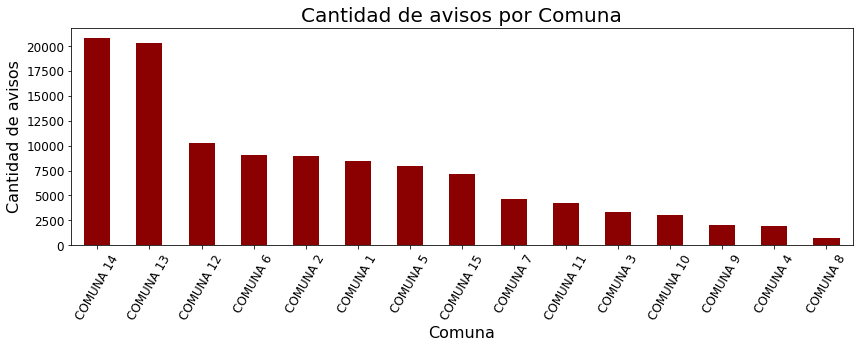

In [44]:
# Mayor cantidad de ventas por comuna
df_caba['COMUNA'].value_counts().head(15).plot(kind='bar',rot=60, figsize=(14,4), color='darkred' ,fontsize=12);
plt.title('Cantidad de avisos por Comuna', fontsize=20);
plt.xlabel('Comuna', fontsize=16);
plt.ylabel('Cantidad de avisos', fontsize=16);

In [51]:
import matplotlib.pyplot as plt
def get_top_places(df, num, cheapest):
    return df.groupby(['COMUNA'])['price_usd_per_m2'].mean().sort_values(ascending=cheapest).head(num)
    
def plot_top_places(df, num, cheapest,colour,title):
    graph = get_top_places(df, num, cheapest).sort_values().plot.barh(figsize=(15,5),color=colour,fontsize=12)
    graph.set_title(title, fontsize=20)
    graph.set_ylabel("Comuna", fontsize=16)
    graph.set_xlabel("USD/m2", fontsize=16)
    plt.show()

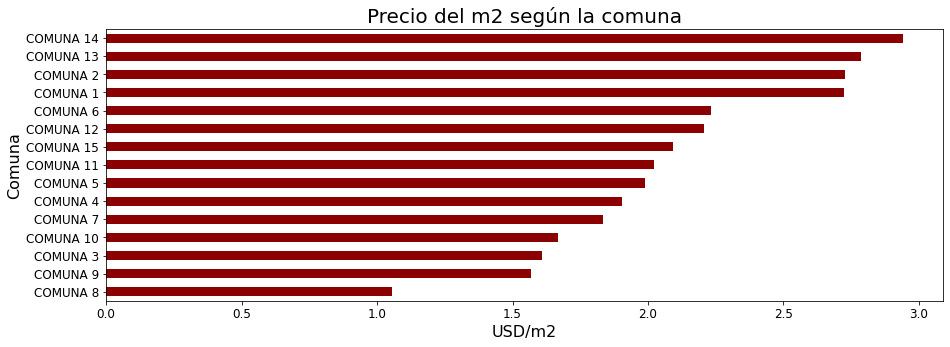

In [52]:
cantidad_comunas_a_mostrar = 15
plot_top_places(df_caba,cantidad_comunas_a_mostrar, False,'darkred',"Precio del m2 según la comuna")

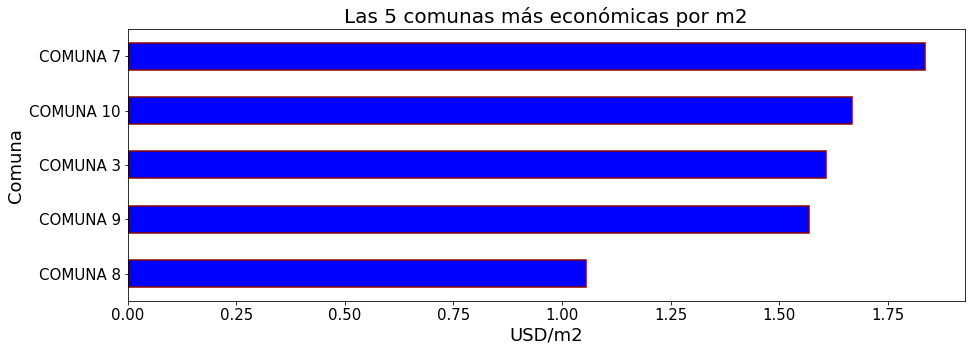

In [33]:
top5_cheap_CABA = get_top_places(df_caba,5, True)

graph = top5_cheap_CABA.sort_values().plot.barh(figsize=(15,5),color='blue',edgecolor='darkred',lineWidth = 1.5,fontsize=15)
graph.set_title("Las 5 comunas más económicas por m2", fontsize=20)
graph.set_ylabel("Comuna", fontsize=18)
graph.set_xlabel("USD/m2", fontsize=18)
plt.show()

In [26]:
# comuna 14 = ['Palermo']
# comuna 13 = ['Núñez', 'Belgrano', 'Colegiales']
# comuna 5 = ['Almagro', 'Boedo']

### relación de comuna y la cantidad de ambientes

In [67]:
import matplotlib.pyplot as plt
def get_comuna_rooms(df, num, cheapest):
    return df.groupby(['COMUNA'])['rooms'].mean().sort_values(ascending=cheapest).head(num)
    
def plot_comuna_rooms(df, num, cheapest,colour,title):
    graph = get_comuna_rooms(df, num, cheapest).sort_values().plot.barh(figsize=(15,5),color=colour,fontsize=12)
    graph.set_title(title, fontsize=20)
    graph.set_ylabel("Comuna", fontsize=15)
    graph.set_xlabel("ambientes", fontsize=15)
    plt.show()

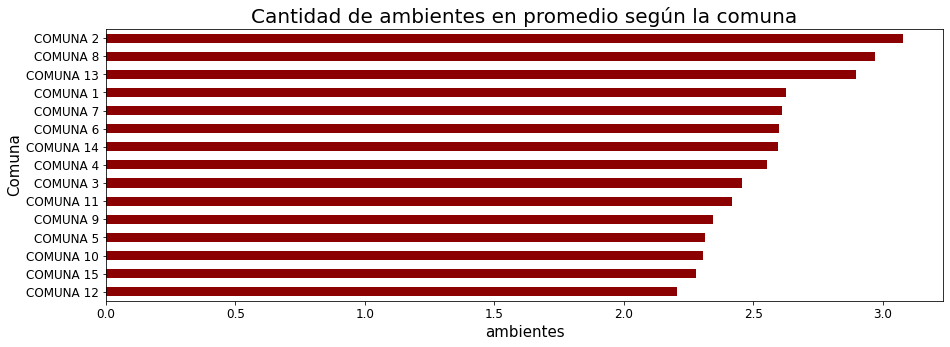

In [69]:
cantidad_comunas_a_mostrar = 15
plot_comuna_rooms(df_caba,cantidad_comunas_a_mostrar, False,'darkred',"Cantidad de ambientes en promedio según la comuna")

### relación de comuna y la superficie total

In [55]:
import matplotlib.pyplot as plt
def get_comuna_superficie(df, num, cheapest):
    return df.groupby(['COMUNA'])['surface_total'].mean().sort_values(ascending=cheapest).head(num)
    
def plot_comuna_superficie(df, num, cheapest,colour,title):
    graph = get_comuna_superficie(df, num, cheapest).sort_values().plot.barh(figsize=(15,5),color=colour,fontsize=12)
    graph.set_title(title, fontsize=20)
    graph.set_ylabel("Comuna", fontsize=16)
    graph.set_xlabel("surface_total", fontsize=16)
    plt.show()

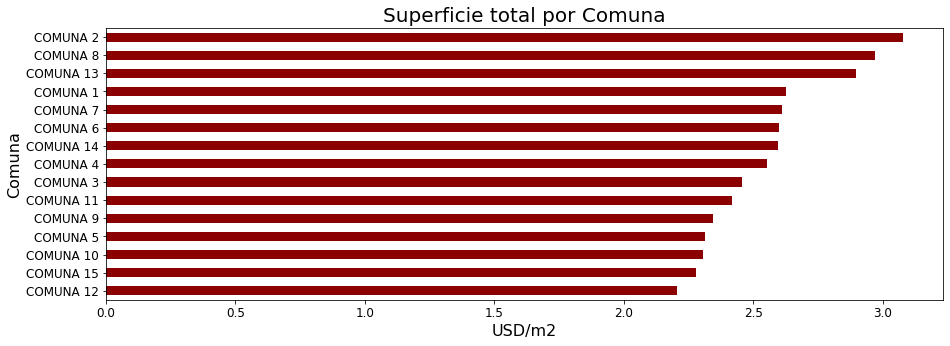

In [58]:
plot_comuna_rooms(df_caba,15, False,'darkred',"Superficie total por Comuna")

In [61]:
#Analizamos la cantidad de ventas para cada mes en todo el año

df_caba['created_on'] = pd.to_datetime(df_caba['created_on'])
df_caba['year'] = df_caba['created_on'].map(lambda x:x.year)
df_caba['month'] = df_caba['created_on'].map(lambda x:x.month)
df_caba['day'] = df_caba['created_on'].map(lambda x:x.day)

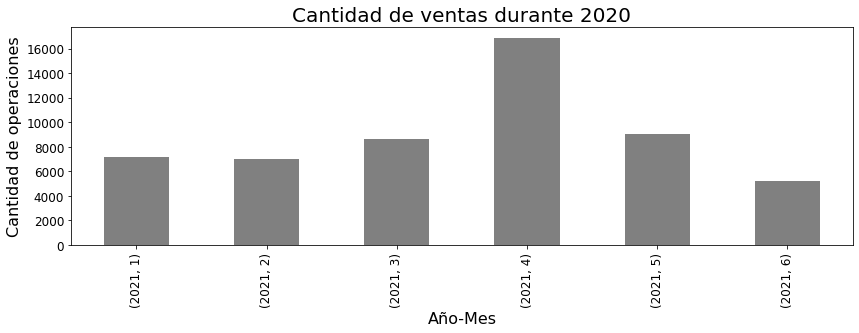

In [62]:
df_caba.groupby(['year','month']).count()['created_on'].plot(kind='bar', rot = 90, figsize=(14,4), color='grey' ,fontsize=12)
plt.title('Cantidad de ventas durante', fontsize=20);
plt.xlabel('Año-Mes', fontsize=16);
plt.ylabel('Cantidad de operaciones', fontsize=16);

In [29]:
df['price'].describe()

count    81352.000000
mean       196.066926
std        153.551826
min          0.000000
25%         99.000000
50%        145.000000
75%        230.000000
max        999.999000
Name: price, dtype: float64

In [30]:
df['price'] = df['price'].loc[df['price'] > 1]

In [31]:
df['price'].describe()

count    81350.000000
mean       196.071746
std        153.550636
min          6.000000
25%         99.000000
50%        145.000000
75%        230.000000
max        999.999000
Name: price, dtype: float64

<AxesSubplot:>

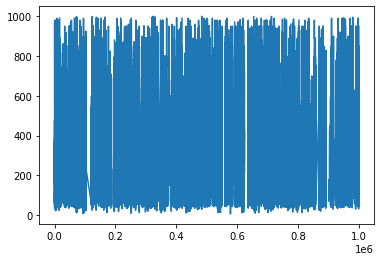

In [32]:
df['price'].plot()

### discretización del precio

In [31]:
df['price'].describe()

count    81352.000000
mean       196.066926
std        153.551826
min          0.000000
25%         99.000000
50%        145.000000
75%        230.000000
max        999.999000
Name: price, dtype: float64

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

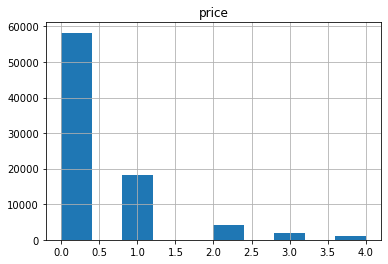

In [32]:
import math

def map_price(x):
    isNan = math.isnan(x)
    x = 0 if isNan else int(x)
    if x < 200:
        return 0
    if x < 400:
        return 1
    if x < 600:
        return 2
    if x < 800:
        return 3
    return 4


df['price'] = df['price'].map(map_price)
df.hist(column='price')

### ###################### solo de prueba ####################

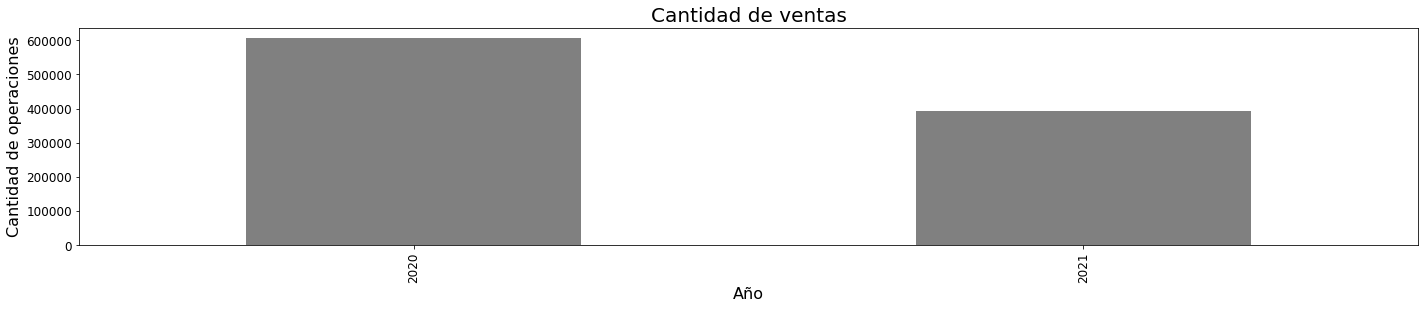

In [39]:
df.groupby(['year']).count()['created_on'].plot(kind='bar', rot = 90, figsize=(24,4), color='grey' ,fontsize=12)
plt.title('Cantidad de ventas', fontsize=20);
plt.xlabel('Año', fontsize=16);
plt.ylabel('Cantidad de operaciones', fontsize=16);

In [85]:
df = df.loc[df['year'] == 2021]
df.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,surface_covered,price,currency,price_period,title,description,property_type,operation_type,year,month
356,zp5GoYzP+yLSOvyYAviFcQ==,Propiedad,2021-03-21,2021-03-28,2021-03-21,-34.994818,-58.047818,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,...,NaN,1234567.0,USD,NaN,local-venta,ORSETTI PROPIEDADES - venta local - WEB : htt...,Cochera,Venta,2021,3
357,r1oPW6tLXNIdIfggCMfPoQ==,Propiedad,2021-03-21,9999-12-31,2021-03-21,NaN,NaN,Argentina,Buenos Aires Costa Atlántica,Pinamar,...,NaN,498000.0,USD,NaN,Casa Venta Pinamar La Herradura 6 Ambientes 6 ...,<b>Casa Venta Pinamar La Herradura 6 Ambientes...,Casa,Venta,2021,3
358,Dn0Gru8fQ3pnoLXpqlZi1g==,Propiedad,2021-03-21,9999-12-31,2021-03-21,-37.161137,-56.898358,Argentina,Buenos Aires Costa Atlántica,Cariló,...,NaN,570000.0,USD,NaN,Cod 280 – Casa Jacaranda,<b>Cod 280 – Casa Jacaranda</b><br><br>[RETASA...,Casa,Venta,2021,3
359,oG1GuDg8l5D8udnRF6338w==,Propiedad,2021-03-21,9999-12-31,2021-03-21,-34.433757,-58.648428,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,...,NaN,165000.0,USD,NaN,"Terreno en Venta ubicado en Castaños, Nordelta",LOTE EN VENTA NORDELTA Oportunidad!!! Barrio C...,Otro,Venta,2021,3
360,am5o3dNflDOO0l8f1E2ngw==,Propiedad,2021-03-21,2021-05-20,2021-03-21,-40.140645,-71.293609,Argentina,Neuquén,Lácar,...,9935.0,179000.0,USD,NaN,Equipo RE/MAX Cordillera vende 1 ha,Corredor Responsable: JENIFER MARIANGELES GUAR...,Lote,Venta,2021,3


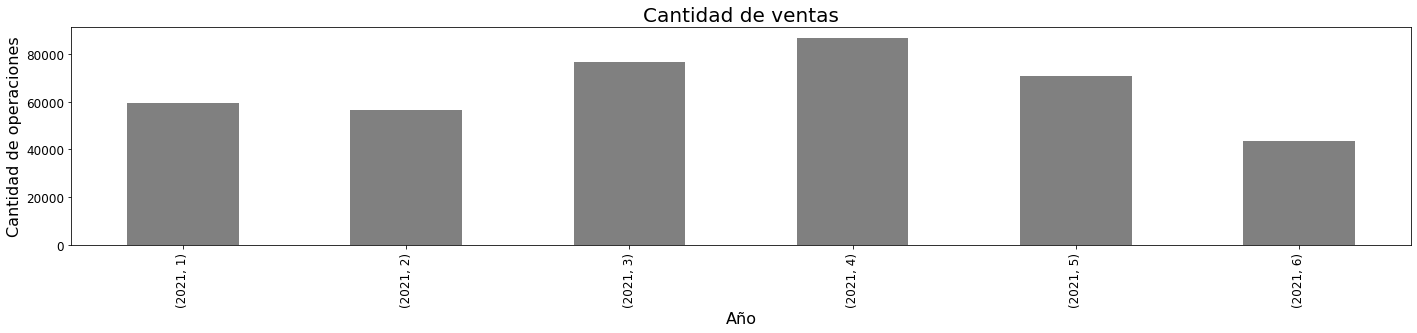

In [86]:
df.groupby(['year','month']).count()['created_on'].plot(kind='bar', rot = 90, figsize=(24,4), color='grey' ,fontsize=12)
plt.title('Cantidad de ventas', fontsize=20);
plt.xlabel('Año', fontsize=16);
plt.ylabel('Cantidad de operaciones', fontsize=16);

In [38]:
df['created_on'] = pd.to_datetime(df['created_on'])
df['year'] = df['created_on'].map(lambda x:x.year)
df.groupby(['year']).count()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,price_usd_per_m2
year,,,,,,,,,,,,,,,,,,,,,
2020,606140,606140,606140,606140,606140,534531,534489,606140,606140,589000,...,317008,311864,577739,575408,242156,606140,606127,606140,606140,300662
2021,393860,393860,393860,393860,393860,359702,359702,393860,393860,376273,...,160823,175892,380504,380083,187714,393859,393831,393860,393860,154292
